In [1]:
!git clone https://github.com/Saitharun279/Face-Recognition-Sample-dataset

Cloning into 'Face-Recognition-Sample-dataset'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 4), reused 39 (delta 3), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [2]:
cd Face-Recognition-Sample-dataset

/content/Face-Recognition-Sample-dataset


In [3]:
!ls

celeb  face  README.md


In [4]:
cd celeb

/content/Face-Recognition-Sample-dataset/celeb


In [5]:
!ls

database_train	test


In [6]:
cd database_train

/content/Face-Recognition-Sample-dataset/celeb/database_train


In [7]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=0769ac522456717dcf16d68679d8f9ff0785eb0944cf1ea687cbd137af220e5c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2

image = cv2.imread("chris evans.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


fd,hog_image = hog(image,orientations=8,pixels_per_cell=(16,16),
                 cells_per_block=(1,1),visualize=True,multichannel=True)
fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
image.shape

In [ ]:
len(fd)

In [ ]:
import face_recognition

from matplotlib.patches import Rectangle,Circle
import numpy as np

%matplotlib inline

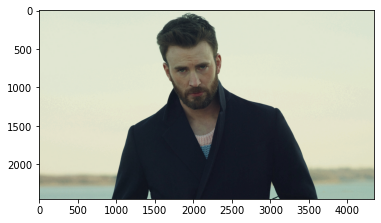

In [ ]:
image = cv2.imread("chris evans.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#image = image.resize((3000,3000),dtype=np.float32)
plt.imshow(image)

In [ ]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 1 face(s) in input image.


A face is located at pixel location Top: 1685, left: 576, bottom: 2351, Right: 1242


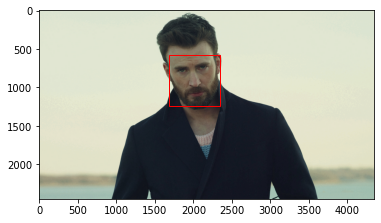

In [ ]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:

  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  print("A face is located at pixel location Top: {}, left: {}, bottom: {}, Right: {}".format(x,y,w,h))

  rect = Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()

In [ ]:
image = cv2.imread("tom cruise.jpg")
tom_cruise = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("chris evans.jpg")
chris_evans = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("Benedict.jpg")
benedict = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
chris_evans_encoding = face_recognition.face_encodings(chris_evans)[0]
tom_cruise_encoding = face_recognition.face_encodings(tom_cruise)[0]
benedict_encoding = face_recognition.face_encodings(benedict)[0]

In [ ]:
known_face_encodings = [
       chris_evans_encoding,
       tom_cruise_encoding,
       benedict_encoding
]

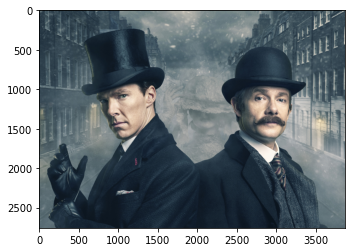

In [ ]:
image = cv2.imread("benedict_Martin.jpg")
unknown_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

In [ ]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 2 face(s) in input image.


A face is located at pixel location Top: 2573, left: 946, bottom: 3238, Right: 1612
A face is located at pixel location Top: 650, left: 872, bottom: 1315, Right: 1538


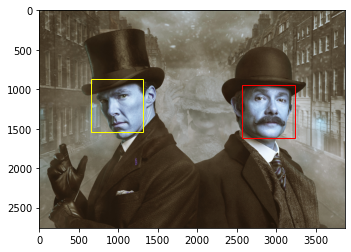

In [ ]:
plt.imshow(image)
ax = plt.gca()
color = ['red','yellow']
i=0
for face_location in face_locations:

  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  print("A face is located at pixel location Top: {}, left: {}, bottom: {}, Right: {}".format(x,y,w,h))

  rect = Rectangle((x,y),w-x,h-y,fill=False,color=color[i])
  ax.add_patch(rect)
  i+=1
plt.show()

In [ ]:
unknown_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

for unknown_encoding in unknown_encodings:

  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding,unknown_encoding)

    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = "Unknown"

  if results[0]:
    name = "Chris Evans image"
  elif results[1]:
    name = "Tom Cruise image"
  elif results[2]:
    name = "Benedict Cumberbatch image"
  
  print(f"Found {name} in the photo")

Found Unknown in the photo
Found Benedict Cumberbatch image in the photo


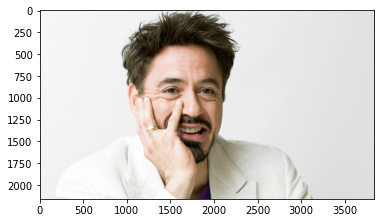

In [ ]:
image = cv2.imread("Robert Downey.jpg")
Robert_Downey_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(Robert_Downey_image)

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(Robert_Downey_image)

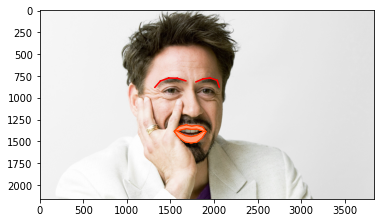

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(Robert_Downey_image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x,pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x,pre_y = x,y

    p = Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(p)
plt.show()